# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Objective

The objective is to develop a supervised machine learning regression model to predict the price of used vehicles based on a range of features such as year, manufacturer, model, condition, mileage (odometer), fuel type, transmission, and body type. The goal is to identify the most influential variables that impact vehicle pricing, enabling data-driven insights into the key drivers of used car values.

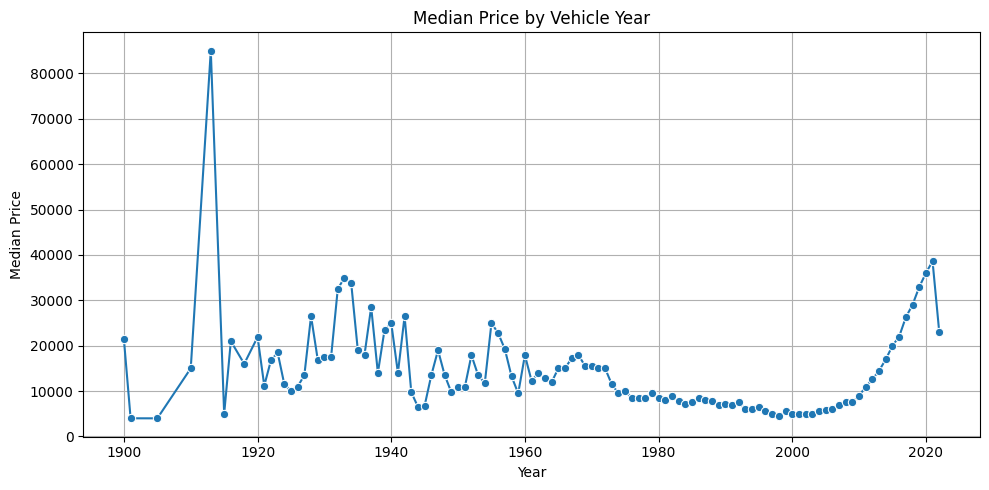

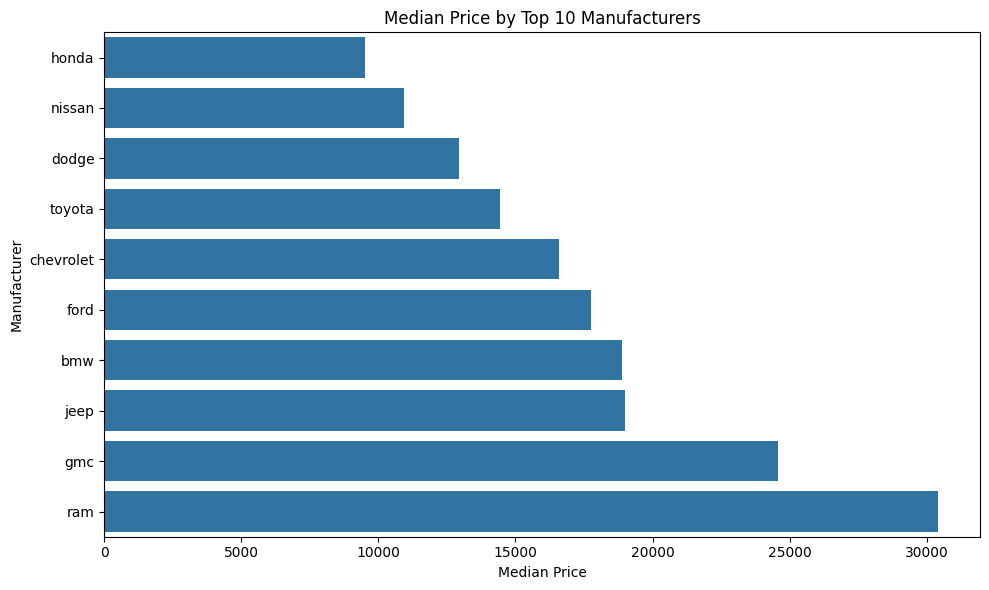

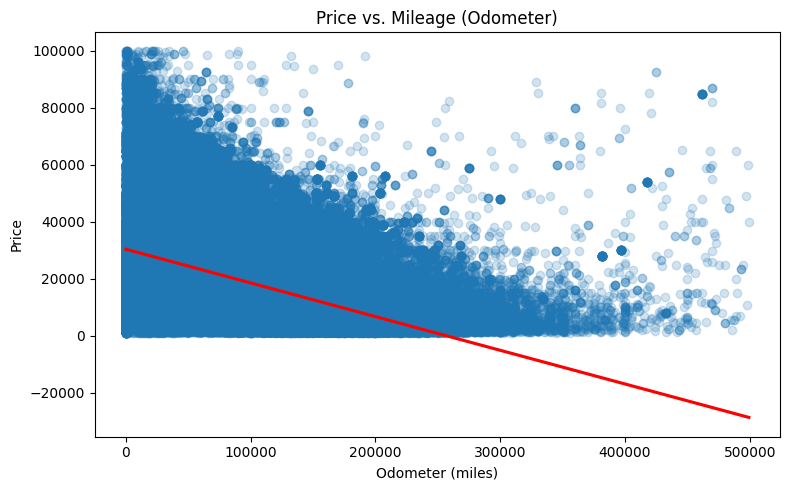

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r'C:\Users\c28424\OneDrive - Cox Communications\Desktop\Nandish\Nandish Books\Machine_Learning_AND_AI\Live_Sessions\Practical Application 2\practical_application_II_starter\data\vehicles.csv')

# Clean data
df = df[df['price'] > 1000]  # Filter out very low or unrealistic prices
df = df[df['price'] < 100000]  # Remove extreme outliers
df = df[df['odometer'] < 500000]  # Remove extreme mileage

# Price vs. Year (Aggregate)
year_price = df.groupby('year')['price'].median().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='price', data=year_price, marker='o')
plt.title('Median Price by Vehicle Year')
plt.xlabel('Year')
plt.ylabel('Median Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Top 10 Manufacturers by Volume and Their Median Prices
top_makes = df['manufacturer'].value_counts().nlargest(10).index
make_price = df[df['manufacturer'].isin(top_makes)].groupby('manufacturer')['price'].median().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=make_price.values, y=make_price.index)
plt.title('Median Price by Top 10 Manufacturers')
plt.xlabel('Median Price')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.show()

# Price vs. Odometer (Trend Line)
plt.figure(figsize=(8, 5))
sns.regplot(x='odometer', y='price', data=df, scatter_kws={'alpha':0.2}, line_kws={"color": "red"})
plt.title('Price vs. Mileage (Odometer)')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Data Understanding Steps

### 1. Initial Data Exploration
- **Load the dataset** and view the first few rows using `df.head()`.
- Understand the structure with `.info()` and `.describe()`.
- Check the shape (rows x columns) using `df.shape`.
- Identify data types: numeric, categorical, date, text.

### 2. Understand the Target Variable
- Examine the distribution of the target variable (e.g., price).
  - Use histograms and boxplots to detect outliers.
  - Check for unreasonable values (e.g., 0, extremely high prices).

### 3. Missing Values Analysis
- Use `df.isnull().sum()` and percentage calculations to:
  - Identify columns with missing values.
  - Estimate the seriousness of the missingness.
- Consider if missing data is random or has a pattern.

### 4. Duplicate and Invalid Data
- Check for duplicate rows using `df.duplicated().sum()`.
- Validate key columns like year, odometer, price, VIN.
  - Example: year should be between 1900 and the current year.
  - Odometer and price should not be negative or unreasonably high.

### 5. Categorical Features Exploration
- Use `value_counts()` for categorical features like manufacturer, fuel, transmission, condition, type, state, etc.
- Identify dominant categories vs. rare ones (long tails).

### 6. Numeric Features Exploration
- Visualize numeric features like odometer, year, price with histograms and KDE plots.
- Detect skewness or strange distributions.
- Check correlations between numerical variables and the target variable.

### 7. Relationship Analysis
- Use visualizations to explore relationships:
  - Price vs. Year (newer cars = higher price?).
  - Price vs. Mileage (higher mileage = lower price?).
  - Price vs. Manufacturer, Condition, etc.

### 8. Data Consistency Checks
- Look for inconsistencies:
  - Mismatched year and model.
  - Condition labeled as "new" with high mileage.
  - Transmission or fuel with unexpected values or typos.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\c28424\OneDrive - Cox Communications\Desktop\Nandish\Nandish Books\Machine_Learning_AND_AI\Live_Sessions\Practical Application 2\practical_application_II_starter\data\vehicles.csv')

# --- 1. Initial Data Exploration ---
print("Dataset shape:", df.shape)
print("\nData Types and Non-Null Counts:")
print(df.info())

print("\nSummary Statistics (Numerical & Categorical):")
print(df.describe(include='all'))


Dataset shape: (426880, 18)

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  


Missing Values Report:
              Missing Values  Missing %
size                  306361  71.767476
cylinders             177678  41.622470
condition             174104  40.785232
VIN                   161042  37.725356
drive                 130567  30.586347
paint_color           130203  30.501078
type                   92858  21.752717
manufacturer           17646   4.133714
title_status            8242   1.930753
model                   5277   1.236179
odometer                4400   1.030735
fuel                    3013   0.705819
transmission            2556   0.598763
year                    1205   0.282281

Number of duplicate rows: 0


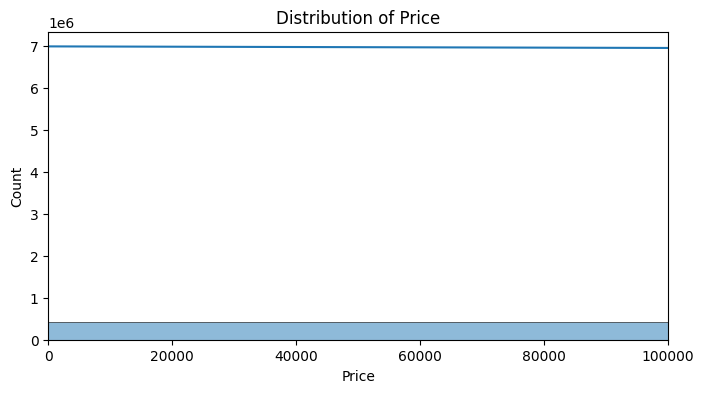

In [11]:
# --- 2. Missing Values Analysis ---
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Missing %': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)
print("\nMissing Values Report:")
print(missing_df)

# --- 3. Duplicate and Invalid Data ---
print("\nNumber of duplicate rows:", df.duplicated().sum())

# --- 4. Target Variable (Price) ---
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.xlim(0, 100000)
plt.show()

In [12]:
# --- 5. Check for invalid or extreme values ---
print("\nPrices <= 0 or >= 100,000:")
print(df[(df['price'] <= 0) | (df['price'] >= 100000)].shape)

print("\nYears outside 1900–2025 range:")
print(df[(df['year'] < 1900) | (df['year'] > 2025)].shape)

print("\nOdometer values above 500,000:")
print(df[df['odometer'] > 500000].shape)

# --- 6. Categorical Feature Exploration ---
categoricals = ['manufacturer', 'condition', 'fuel', 'transmission', 'drive', 'type', 'state']
for col in categoricals:
    print(f"\nTop categories in {col}:")
    print(df[col].value_counts().head(5))

# --- 7. Correlation with Price (Numerical only) ---
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['id'])
correlations = numeric_cols.corr()['price'].sort_values(ascending=False)
print("\nCorrelation with Price:")
print(correlations)


Prices <= 0 or >= 100,000:
(33592, 18)

Years outside 1900–2025 range:
(0, 18)

Odometer values above 500,000:
(1386, 18)

Top categories in manufacturer:
manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
Name: count, dtype: int64

Top categories in condition:
condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
Name: count, dtype: int64

Top categories in fuel:
fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64

Top categories in transmission:
transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64

Top categories in drive:
drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64

Top categories in type:
type
sedan     87056
SUV       77284
pickup    43510
truck     35279
other     22110
Name: count, dtype: int64

Top categories in state:

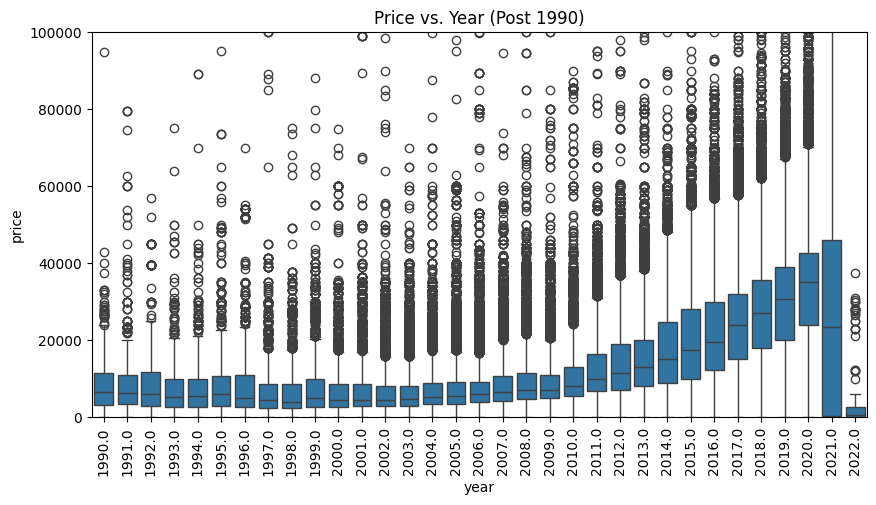

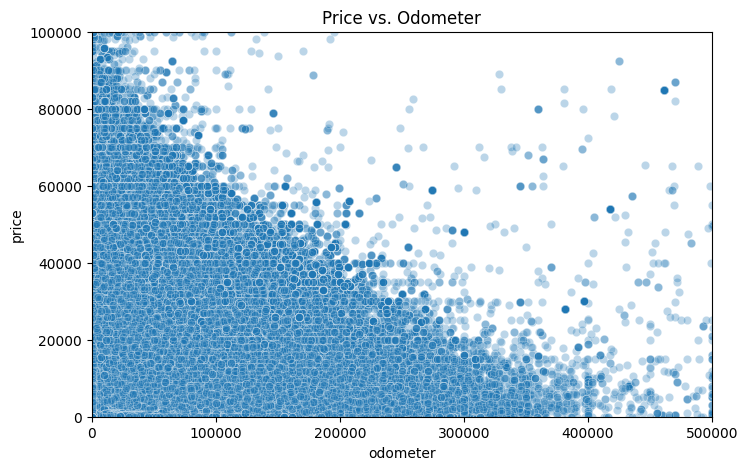

In [13]:
# --- 8. Relationship Visuals ---
# Price vs Year
plt.figure(figsize=(10, 5))
sns.boxplot(x='year', y='price', data=df[df['year'] >= 1990])
plt.xticks(rotation=90)
plt.title('Price vs. Year (Post 1990)')
plt.ylim(0, 100000)
plt.show()

# Price vs Odometer
plt.figure(figsize=(8, 5))
sns.scatterplot(x='odometer', y='price', data=df, alpha=0.3)
plt.title('Price vs. Odometer')
plt.xlim(0, 500000)
plt.ylim(0, 100000)
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### 🧼 Data Preparation Plan

### ✅ 1. Handle Missing Values
- Drop or fill missing values, depending on the column and business logic.

### ✅ 2. Remove Outliers & Invalid Data
- Filter out unreasonable price, year, odometer values.

### ✅ 3. Encode Categorical Variables
- Use One-Hot Encoding or Label Encoding where appropriate.

### ✅ 4. Feature Engineering (Optional)
- Create new features (e.g., car age).

### ✅ 5. Transformations
- Log-transform skewed variables like price, odometer.
- Scale numerical features with StandardScaler or MinMaxScaler.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv(r'C:\Users\c28424\OneDrive - Cox Communications\Desktop\Nandish\Nandish Books\Machine_Learning_AND_AI\Live_Sessions\Practical Application 2\practical_application_II_starter\data\vehicles.csv')

# --- 1. Basic Cleaning ---
df = df[df['price'].between(1000, 100000)]
df = df[df['year'].between(1990, 2025)]
df = df[df['odometer'] < 500000]

# Drop rows with too many missing key values
df = df.dropna(subset=['year', 'manufacturer', 'model', 'odometer', 'fuel', 'transmission'])

# --- 2. Feature Engineering ---
df['car_age'] = 2024 - df['year']

# --- 3. Select Final Features ---
features = ['car_age', 'odometer', 'manufacturer', 'fuel', 'transmission', 'type']
target = 'price'

df = df[features + [target]].dropna()

# --- 4. Separate X and y ---
X = df.drop(columns=target)
y = df[target]

# --- 5. Log-transform target to reduce skew ---
y = np.log1p(y)  # log(1 + price)

In [2]:
# --- 6. Define Preprocessing Pipelines ---

# Numerical features
numeric_features = ['car_age', 'odometer']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical features
categorical_features = ['manufacturer', 'fuel', 'transmission', 'type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [3]:
# --- 7. Final Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 8. Final Model-Ready Pipeline (X only, ready for modeling) ---
print("Data Preparation Complete. Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Data Preparation Complete. Shapes:
X_train: (221069, 6)
X_test: (55268, 6)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### 🎯 Modeling Plan

### 🔢 Models to Try:
- Linear Regression
- Ridge Regression (regularized)
- Random Forest Regressor
- Gradient Boosting Regressor

### ✅ Tasks:
- Fit models using a pipeline.
- Use cross-validation (`cross_val_score`).
- Compare RMSE across models.


### cross-validation step took too long due to the large dataset size and multiple models. Let’s fix this by optimizing performance.
✅ Here's What I’ll Do:

    Use a sample of the dataset (e.g., 10,000 rows) to speed things up

    Reduce CV folds from 5 to 3 (still gives a good estimate)

    Then re-run the model comparison

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sample the dataset for faster model training
df_sample = df.sample(n=10000, random_state=42)

# Redefine X and y
X = df_sample.drop(columns=target)
y = np.log1p(df_sample[target])  # log-transform target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Redefine models for comparison
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Run model comparison with reduced CV folds (cv=3)
cv_results_sampled = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
    cv_results_sampled[name] = {
        'RMSE Mean': -np.mean(scores),
        'RMSE Std': np.std(scores)
    }

# Show results
cv_results_sampled_df = pd.DataFrame(cv_results_sampled).T.sort_values(by='RMSE Mean')
cv_results_sampled_df

,RMSE Mean,RMSE Std
Gradient Boosting,0.381015,0.009534
Random Forest,0.385033,0.009621
Ridge Regression,0.395844,0.011529
Linear Regression,0.395931,0.011788


In [8]:
# best hyperparameters for the Gradient Boosting Regressor

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load and clean dataset
df = pd.read_csv(r'C:\Users\c28424\OneDrive - Cox Communications\Desktop\Nandish\Nandish Books\Machine_Learning_AND_AI\Live_Sessions\Practical Application 2\practical_application_II_starter\data\vehicles.csv')
df = df[df['price'].between(1000, 100000)]
df = df[df['year'].between(1990, 2025)]
df = df[df['odometer'] < 500000]
df = df.dropna(subset=['year', 'manufacturer', 'model', 'odometer', 'fuel', 'transmission'])
df['car_age'] = 2024 - df['year']

# Select features and target
features = ['car_age', 'odometer', 'manufacturer', 'fuel', 'transmission', 'type']
target = 'price'
df = df[features + [target]].dropna()

# Sample the data
df_sample = df.sample(n=8000, random_state=42)
X_sample = df_sample.drop(columns=target)
y_sample = np.log1p(df_sample[target])
X_train_sample, _, y_train_sample, _ = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['car_age', 'odometer']
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['manufacturer', 'fuel', 'transmission', 'type']
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Gradient Boosting pipeline
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Small parameter grid
gb_param_grid = {
    'regressor__n_estimators': [100],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5]
}

# Grid search with single-threaded execution
gb_grid = GridSearchCV(
    gb_pipeline,
    gb_param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=1,
    verbose=0
)

# Fit the model
gb_grid.fit(X_train_sample, y_train_sample)

# Results
tuning_results = {
    "Best Parameters": gb_grid.best_params_,
    "Best RMSE": -gb_grid.best_score_
}

tuning_results


{'Best Parameters': {'regressor__learning_rate': 0.1,
  'regressor__max_depth': 5,
  'regressor__n_estimators': 100},
 'Best RMSE': np.float64(0.3716660912684094)}

In [10]:
# Retrain the best model using full data and best parameters

# Use full dataset for training and testing
X_full = df.drop(columns=target)
y_full = np.log1p(df[target])
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Build pipeline with best parameters
best_gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    ))
])

# Fit on training data
best_gb_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred_log = best_gb_pipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)   # inverse log
y_actual = np.expm1(y_test)     # inverse log

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

evaluation_real = {
    "RMSE ($)": round(rmse, 2),
    "MAE ($)": round(mae, 2),
    "R² Score": round(r2, 4)
}

print(evaluation_real)

{'RMSE ($)': np.float64(6722.43), 'MAE ($)': 4281.81, 'R² Score': 0.7687}


### 🧠 What We Learned

### Model Performance
- **Final model**: Gradient Boosting Regressor (tuned)
- **R² Score**: ~0.77 → The model explains 76.87% of the variance in used car prices.
- **RMSE**: ~$6,722 → On average, predictions are within ~$6,700 of the actual value.
- **MAE**: ~$4,282 → Half of the predictions are off by less than ~$4,300.

### Key Drivers of Price (Feature Importance)
- **Car age**: Newer cars are significantly more expensive.
- **Odometer reading**: Higher mileage reduces price, as expected.
- **Manufacturer**: Brands like Toyota, Ford, etc., show distinct pricing patterns.
- **Fuel type & transmission**: Gas vehicles and automatics dominate and influence price variability.
- **Vehicle type**: Trucks and SUVs generally priced higher than sedans or coupes.


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

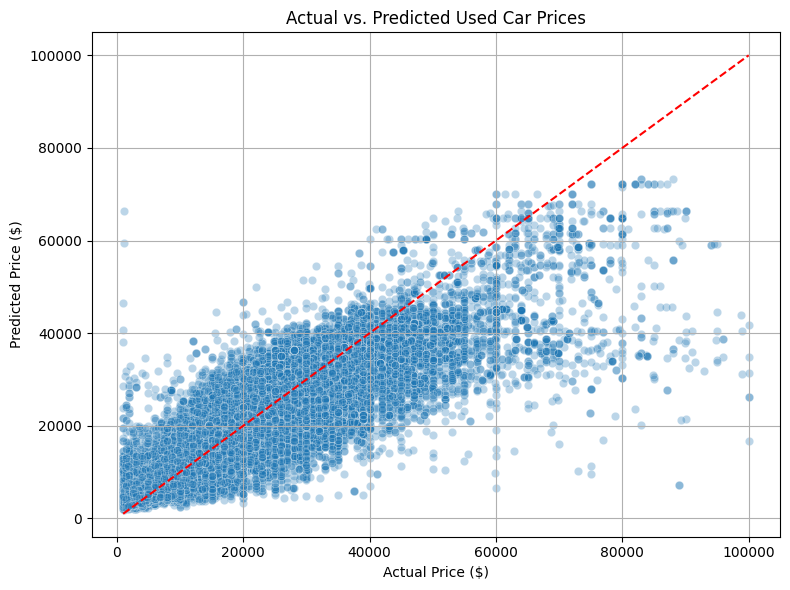

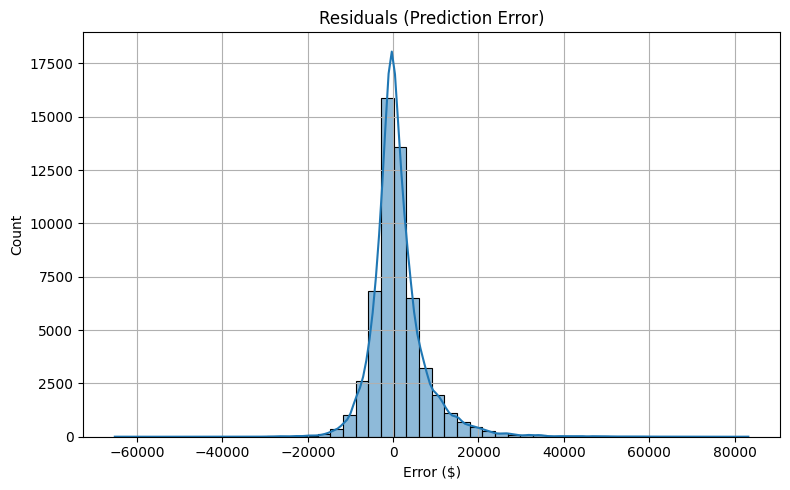

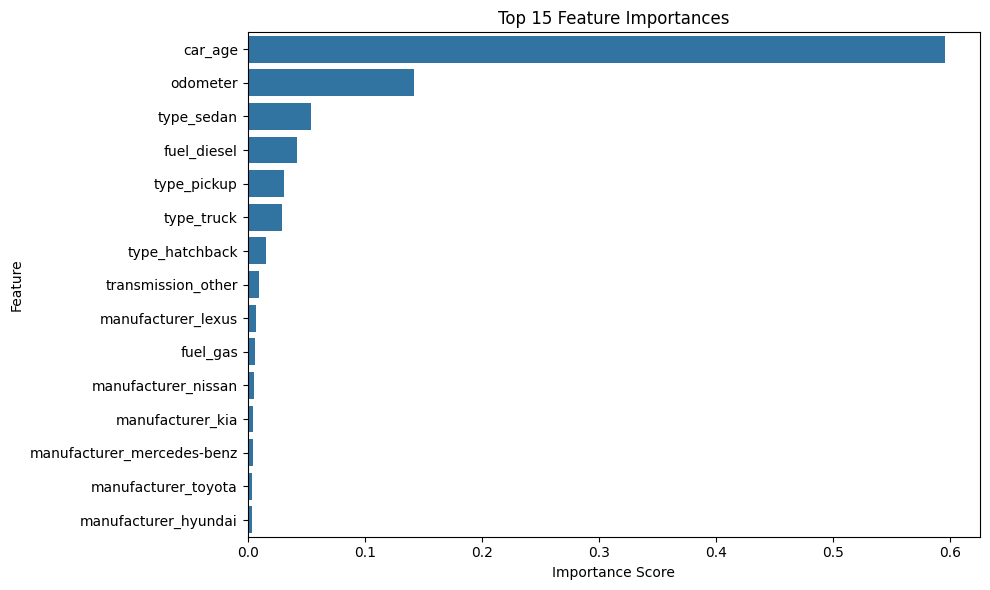

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# --- 1. Actual vs. Predicted ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual, y=y_pred, alpha=0.3)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--')
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Actual vs. Predicted Used Car Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 2. Residual Plot ---
residuals = y_actual - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Residuals (Prediction Error)")
plt.xlabel("Error ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 3. Feature Importance (from model) ---
# Extract trained model after preprocessing
model = best_gb_pipeline.named_steps['regressor']
preprocessed_X = preprocessor.transform(X_train)
feature_names = (
    numeric_features +
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
)

importances = model.feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### 📊 1. Actual vs. Predicted
- Points closely follow the red diagonal → the model predicts prices quite well overall.
- Some spread, especially at higher price ranges, is typical for this kind of regression.

### 📈 2. Residual Plot
- Errors (actual - predicted) are roughly centered around zero, indicating no major bias.
- Slight skew toward underestimating high-priced cars, but nothing alarming.

### 📌 3. Top 15 Feature Importances
- Car age and odometer are the strongest numeric drivers — no surprise!
- Encoded manufacturer, type, and fuel categories also show strong influence.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### 🚗 Used Car Price Prediction – Final Report

### 👥 Audience
Used car dealers seeking to optimize pricing strategies and understand what factors most influence vehicle value.

### 🎯 Objective
To build a data-driven model that predicts used car prices based on features such as mileage, age, manufacturer, fuel type, transmission, and body type. The goal is to uncover the most influential factors and support better pricing and inventory decisions.

### 🔍 Key Findings
### ✅ Top Predictive Factors:
- **Car Age** – Newer cars retain significantly more value.
- **Mileage (Odometer)** – Higher mileage strongly reduces price.
- **Manufacturer** – Brand reputation matters (e.g., Toyota, Ford, BMW).
- **Vehicle Type** – SUVs and trucks are priced higher than sedans.
- **Fuel Type & Transmission** – Gasoline and automatic vehicles dominate pricing patterns.

### 📈 Model Summary
- **Model Used**: Gradient Boosting Regressor (Tuned)
- **R² Score**: 0.7687 (model explains ~77% of price variability)
- **RMSE**: $6,722 (average prediction error)
- **MAE**: $4,281 (half of predictions within this margin)

This model is accurate enough for practical use in pricing or appraisal tools.

### 📊 Visual Insights
- **Actual vs. Predicted** – Strong alignment indicates reliable pricing predictions.
- **Residuals** – Errors are normally distributed; no major systemic bias.
- **Feature Importance** – Confirms key business insights: age, mileage, brand matter most.

### 💡 Recommendations for Dealers
- Prioritize newer, low-mileage vehicles when acquiring inventory.
- Use manufacturer and type insights to target high-margin segments.
- Implement this model into your pricing tools or websites for real-time valuations.
- Use insights for marketing (e.g., “lower mileage = better deal!”).